In [180]:
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])

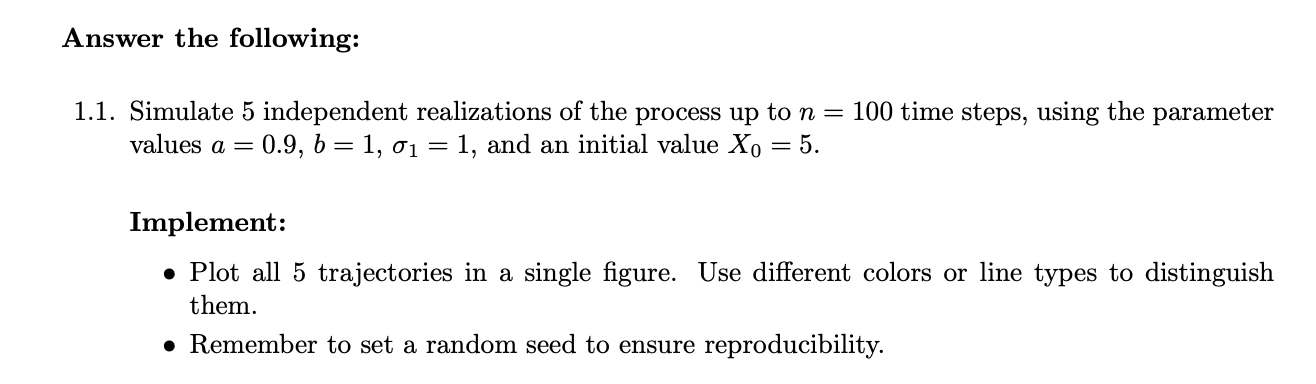

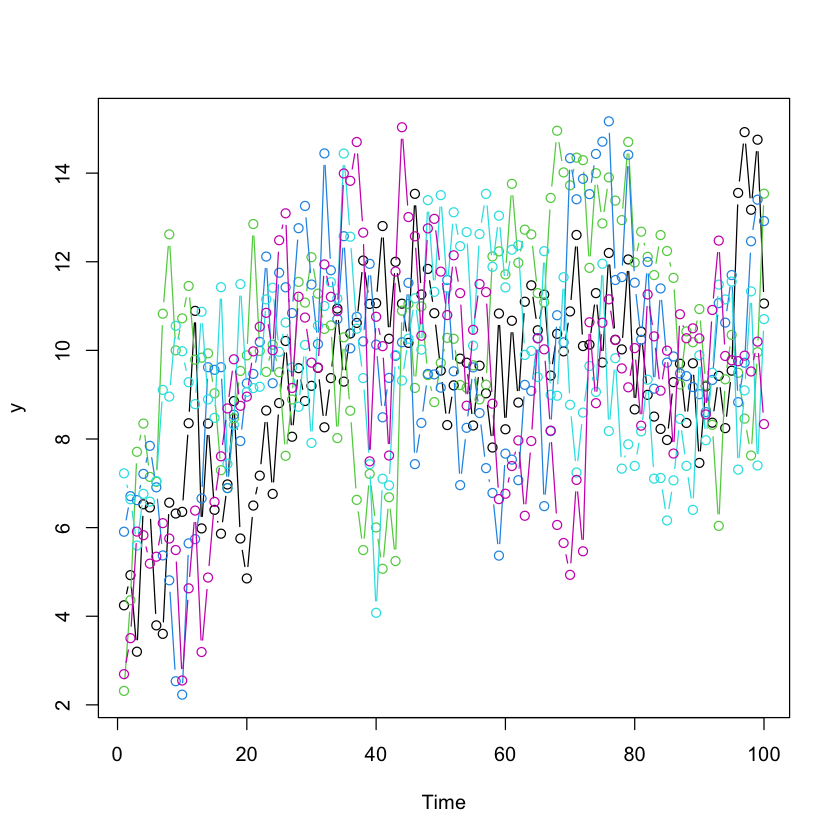

In [181]:
set.seed(25)
A <- 0.9
B <- 1
C <- 1
X0 <- 5
n <- 100
y <- matrix(NA, nrow = n, ncol = 5)
for (j in 1:5){
X <- X0
for (i in 1:n){
    X <- A * X + B + rnorm(1)
    y[i,j] <- C*X +  rnorm(1)
}
}

par(bg="white")
plot(y[,1], type="b", xlab="Time", ylab="y", ylim=range(y,na.rm=TRUE))
for (i in 2:5){
    lines(y[,i], type="b",col = i+1)
}

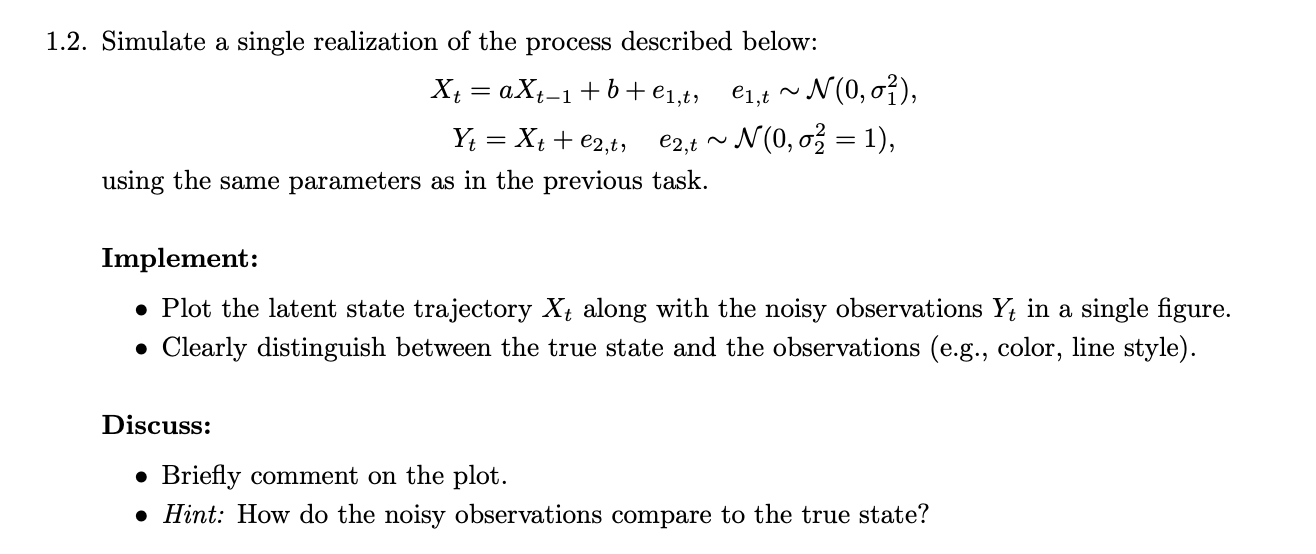

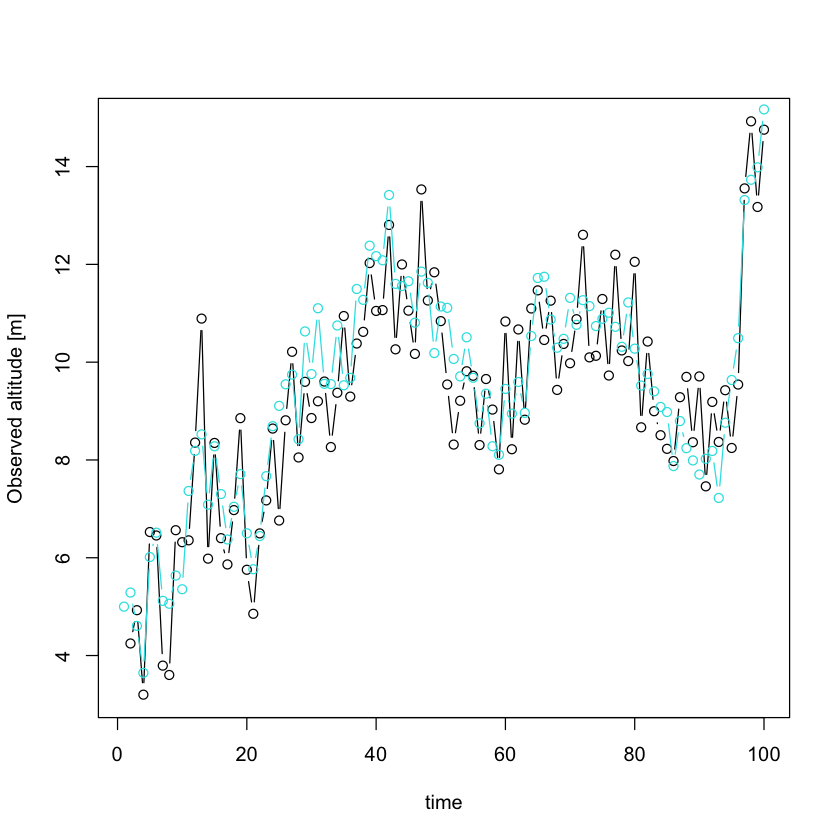

In [182]:
set.seed(25)
A <- 0.9
B <- 1
C <- 1
X0 <- 5
n <- 100
X <- matrix(NA, n)
y <- matrix(NA, n)

X[1] <- X0
for (i in 2:n){
    X[i] <- A * X[i-1] + B + rnorm(1)
    y[i] <- C*X[i] +  rnorm(1)
}

par(bg="white")
plot(y, type="b", xlab="time", ylab="Observed altitude [m]", ylim=range(y,na.rm=TRUE))
lines(X, type="b",col=5)

In [183]:
results <- myKalmanFilter(y = y[2:length(y)],theta = c(1,0.9,1),R = 1, x_prior = 5, P_prior = 1000)

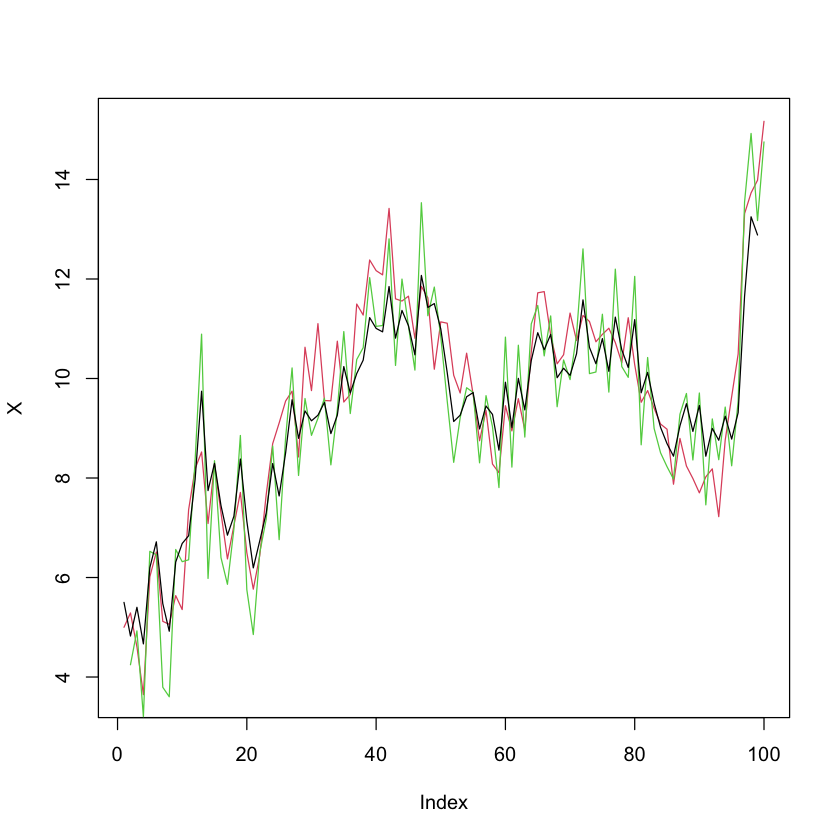

In [184]:
par(bg="white")
plot(X,type="l",col=2)
lines(y,type = "l",col = 3)
lines(results$x_pred,type = "l",col = 1)

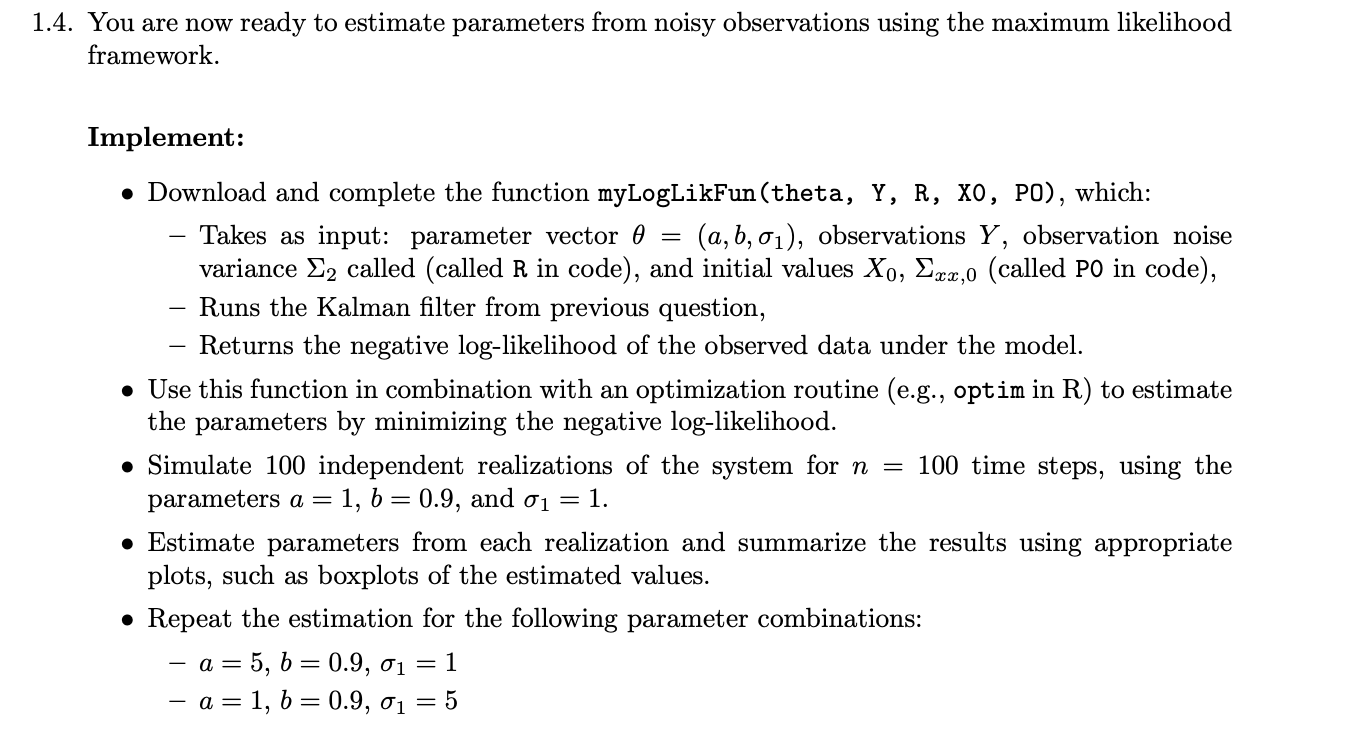

In [185]:
myLogLikFun(y = y[2:100],theta = c(1,0.9,1),R = 1, x_prior = 5, P_prior = 1000)

[1] 90.29192

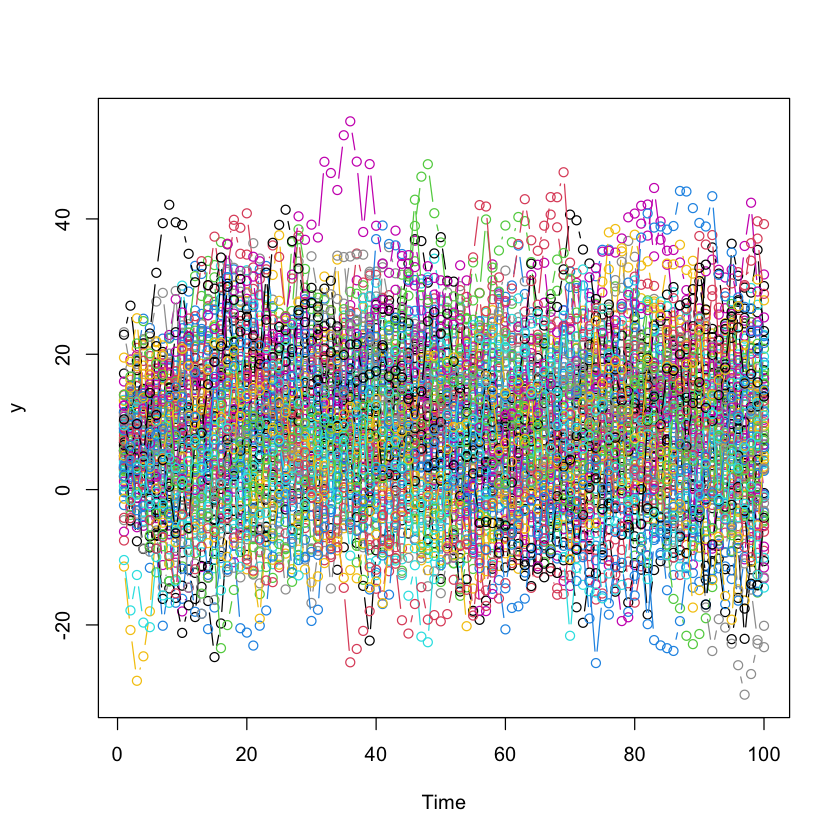

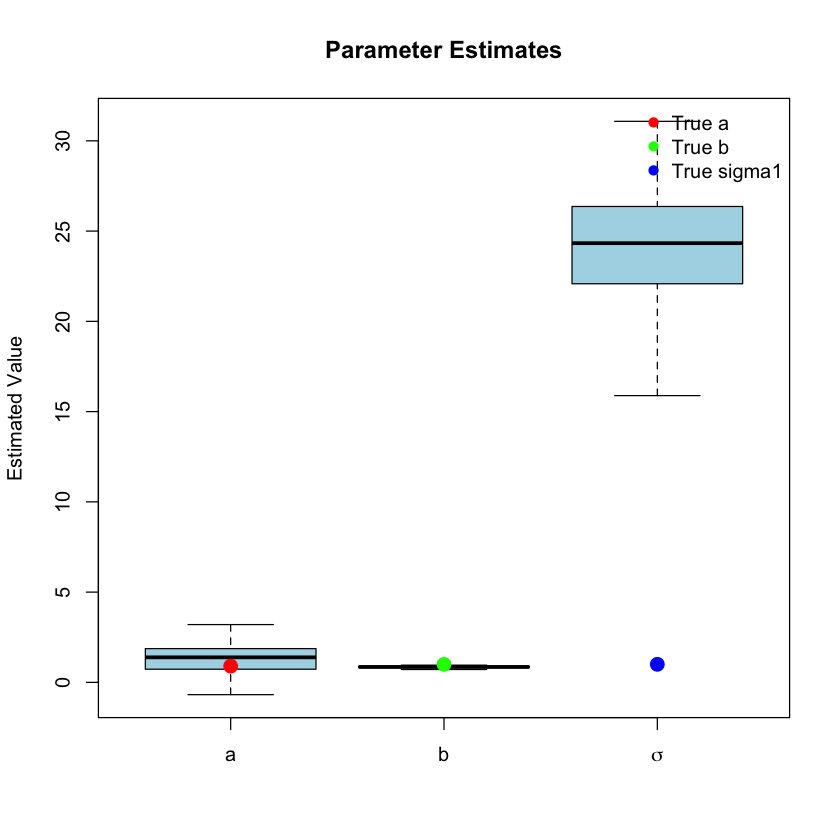

In [186]:
set.seed(25)
A <- 0.9
B <- 1
C <- 1
sigma1 <-5
X0 <- 5
n <- 100
y <- matrix(NA, nrow = n, ncol = n)
for (j in 1:n){
X <- X0
for (i in 1:n){
    X <- A * X + B + rnorm(1, sd=sigma1)
    y[i,j] <- C*X +  rnorm(1)
}
}

par(bg="white")
plot(y[,1], type="b", xlab="Time", ylab="y", ylim=range(y,na.rm=TRUE))
for (i in 2:n){
    lines(y[,i], type="b",col = i+1)
}
Estimatedparameters <- matrix(NA, nrow = n, ncol = 3)
for (i in 1:n){
Estimatedparameters[i,] <- optim(fn=myLogLikFun, par = c(5,10,10), y=y[,i], R=1, x_prior = 0, P_prior=10)$par
}
boxplot(Estimatedparameters, names = c("a", "b", expression(sigma)),
          main = paste("Parameter Estimates"),
          col = "lightblue", outline = FALSE, 
          ylab = "Estimated Value")
points(x = 1:3, y = c(A, B, 1), pch = 19, col = c("red", "green", "blue"), cex = 1.5)
legend("topright", legend = c("True a", "True b", "True sigma1"), 
       col = c("red", "green", "blue"), pch = 19, bty = "n")


Warning message in geom_point(aes(x = 1, y = A, color = "True value"), size = 3):
"All aesthetics have length 1, but the data has 100 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_point(aes(x = 1, y = B, color = "True value"), size = 3):
"All aesthetics have length 1, but the data has 100 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_point(aes(x = 1, y = sigma1, color = "True value"), size = 3):
"All aesthetics have length 1, but the data has 100 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


quartz_off_screen 
                3

pdf 
  2

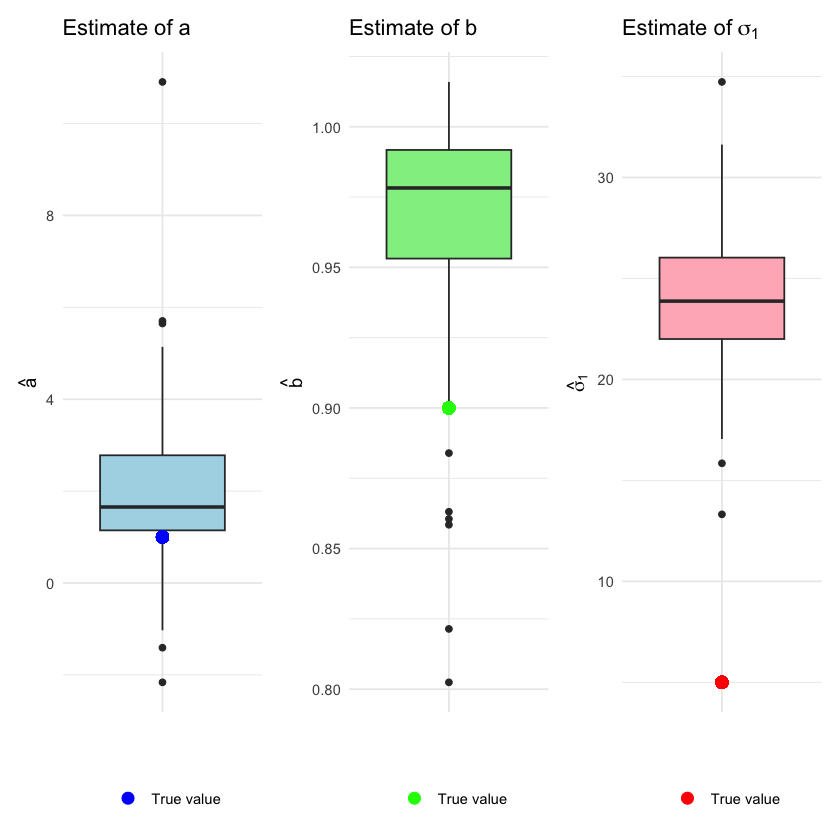

In [234]:
library(patchwork)  # Load patchwork for easy combination of plots
library(ggplot2)    # Use ggplot2 for prettier boxplots

set.seed(25)
A <- 1
B <- 0.9
C <- 1
sigma1 <- 5
X0 <- 5
n <- 100
y <- matrix(NA, nrow = n, ncol = n)

for (j in 1:n){
  X <- X0
  for (i in 1:n){
    X <- A * X + B + rnorm(1, sd=sigma1)
    y[i,j] <- C*X + rnorm(1)
  }
}

Estimatedparameters <- matrix(NA, nrow = n, ncol = 3)
for (i in 1:n){
  Estimatedparameters[i,] <- optim(fn=myLogLikFun, par = c(10,0.9,10), y=y[,i], R=1, x_prior = 0, P_prior=10)$par
}

# Make a data frame for easier plotting
est_df <- data.frame(
  a = Estimatedparameters[,1],
  b = Estimatedparameters[,2],
  sigma = Estimatedparameters[,3]
)

# Create each individual boxplot
b1 <- ggplot(est_df, aes(x = "", y = a)) +
  geom_boxplot(fill = "lightblue") +
  geom_point(aes(x = 1, y = A, color = "True value"), size = 3) +  # Map color
  scale_color_manual(name = "", values = c("True value" = "blue")) +  # Define color
  labs(title = "Estimate of a", y = expression(hat(a)), x = "") +
  theme_minimal() +
  theme(legend.position = "bottom")  # Optional: place legend at bottom

b2 <- ggplot(est_df, aes(x = "", y = b)) +
  geom_boxplot(fill = "lightgreen") +
  geom_point(aes(x = 1, y = B, color = "True value"), size = 3) +
  scale_color_manual(name = "", values = c("True value" = "green")) +
  labs(title = "Estimate of b", y = expression(hat(b)), x = "") +
  theme_minimal() +
  theme(legend.position = "bottom")

b3 <- ggplot(est_df, aes(x = "", y = sigma)) +
  geom_boxplot(fill = "lightpink") +
  geom_point(aes(x = 1, y = sigma1, color = "True value"), size = 3) +
  scale_color_manual(name = "", values = c("True value" = "red")) +
  labs(title = expression("Estimate of" ~ sigma[1]), y = expression(hat(sigma)[1]), x = "") +
  theme_minimal() +
  theme(legend.position = "bottom")

# Combine them side-by-side
b1 | b2 | b3

dev.copy(png, file = "1,43.png", width = 600, height = 600, res = 100)
dev.off()


In [202]:
Estimatedparameters[1]

[1] 5.978491

Warning message:
"Removed 3 rows containing non-finite outside the scale range
(`stat_density()`)."


quartz_off_screen 
                3

pdf 
  2

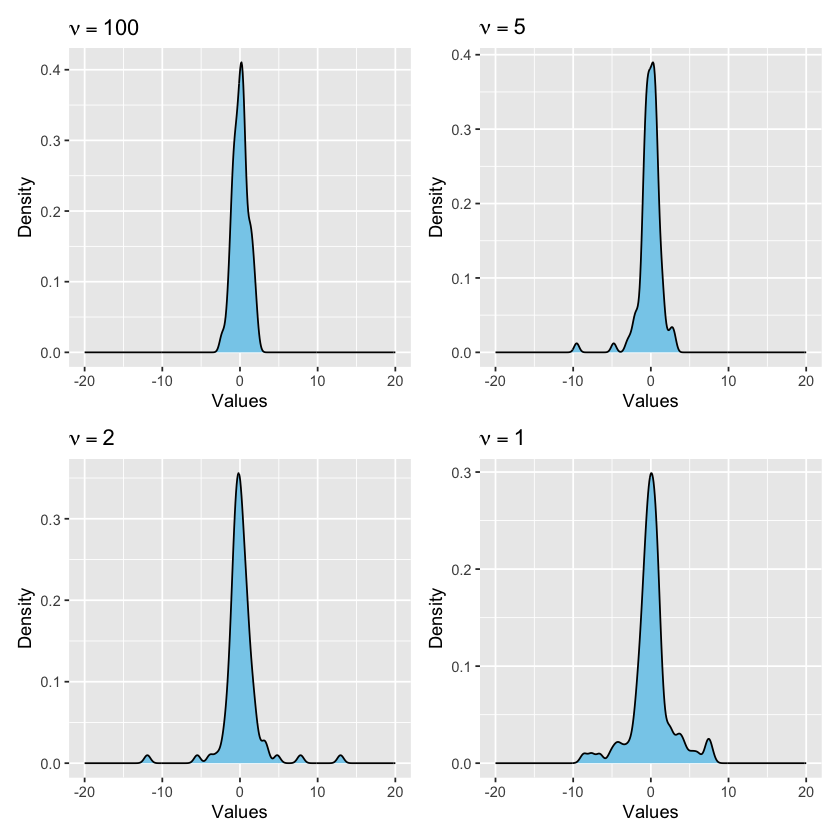

In [250]:
library(ggplot2) # install.packages("ggplo2")
library(patchwork)  # install.packages("patchwork")

set.seed(25)

# Create 4 datasets
data100 <- data.frame(value = rt(100, 100))
data5 <- data.frame(value = rt(100, 5))
data2 <- data.frame(value = rt(100, 2))
data1 <- data.frame(value = rt(100, 1))

# Create 4 separate plots
p1 <- ggplot(data100, aes(x = value)) +
  geom_density(fill = "skyblue", alpha = 1) +
  labs(title = expression(nu == 100), x = "Values", y = "Density") +
  xlim(-20, 20)

p2 <- ggplot(data5, aes(x = value)) +
  geom_density(fill = "skyblue", alpha = 1) +
  labs(title = expression(nu == 5), x = "Values", y = "Density") +
  xlim(-20, 20)

p3 <- ggplot(data2, aes(x = value)) +
  geom_density(fill = "skyblue", alpha = 1) +
  labs(title = expression(nu == 2), x = "Values", y = "Density") +
  xlim(-20, 20)

p4 <- ggplot(data1, aes(x = value)) +
  geom_density(fill = "skyblue", alpha = 1) +
  labs(title = expression(nu == 1), x = "Values", y = "Density") +
  xlim(-20, 20)

# Arrange them together
(p1 | p2) / (p3 | p4)
dev.copy(png, file = "1,5.png", width = 600, height = 600, res = 100)
dev.off()

Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning mes

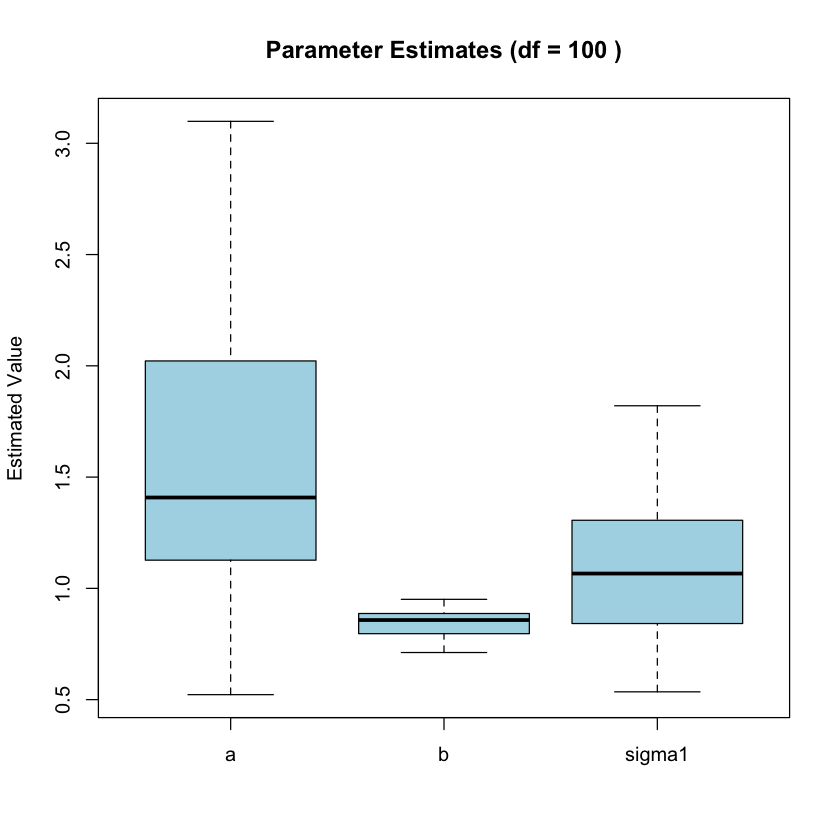

Warning message in log(S):
"NaNs produced"


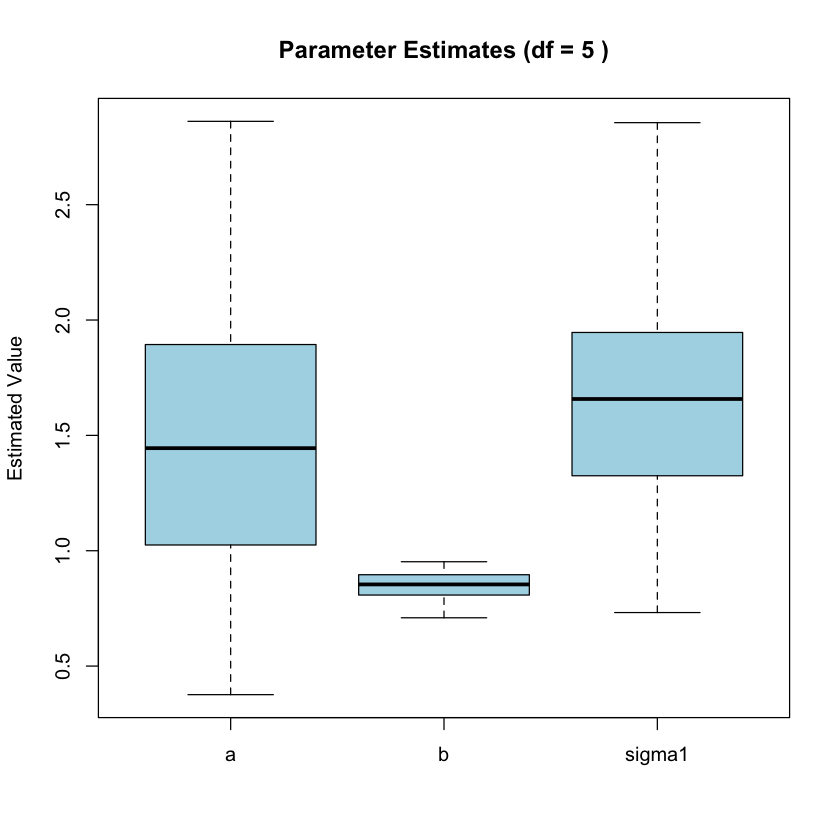

Warning message in log(S):
"NaNs produced"


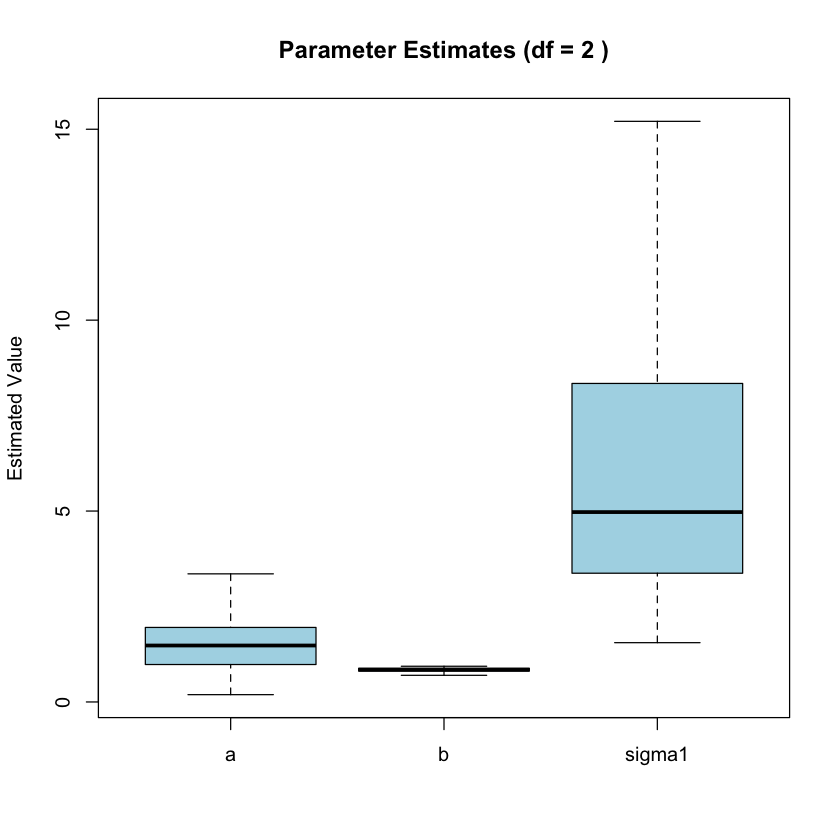

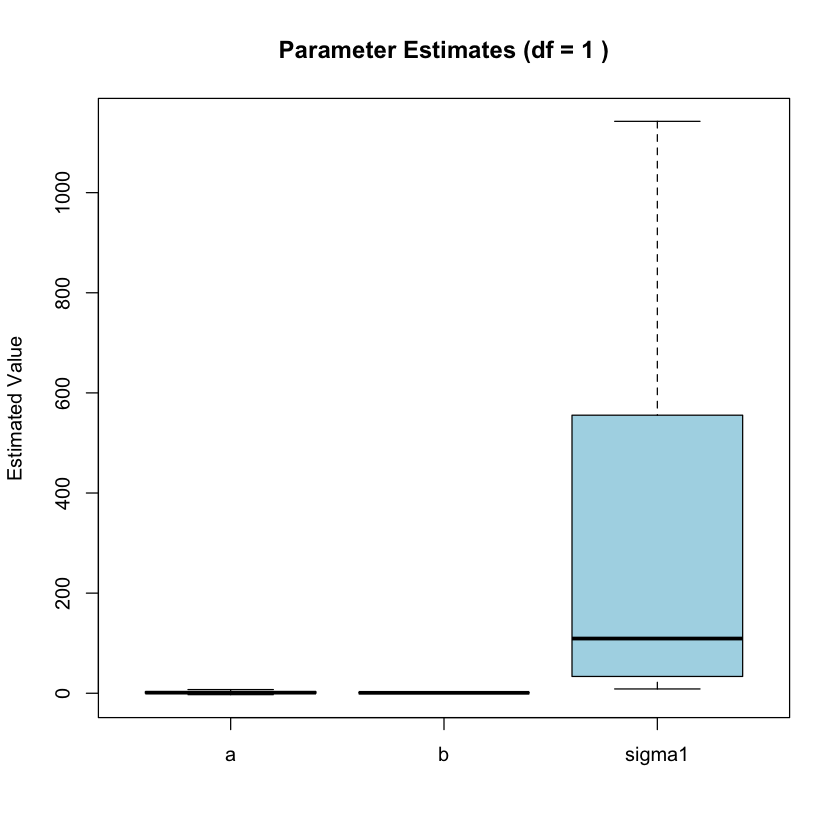

In [188]:
set.seed(25)
A <- 0.9
B <- 1
C <- 1
X0 <- 5
n <- 100
m <- 100
y <- matrix(NA, nrow = n, ncol = m)
df <- c(100,5,2,1)
for (v in 1:4){
Estimatedparameters <- matrix(NA, nrow = n, ncol = 3)
for (j in 1:m){
X <- X0
for (i in 1:n){
    X <- A * X + B + rt(1,df[v])
    y[i,j] <- C*X +  rnorm(1)
}
}

for (j in 1:m){
Estimatedparameters[j,] <- optim(fn=myLogLikFun, par = c(5,5,5), y=y[,j], R=1, x_prior = 0, P_prior=10)$par
}
boxplot(Estimatedparameters, names = c("a", "b", "sigma1"),
          main = paste("Parameter Estimates (df =", df[v], ")"),
          col = "lightblue", outline = FALSE, 
          ylab = "Estimated Value")
}



Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning message in log(S):
"NaNs produced"
Warning mes

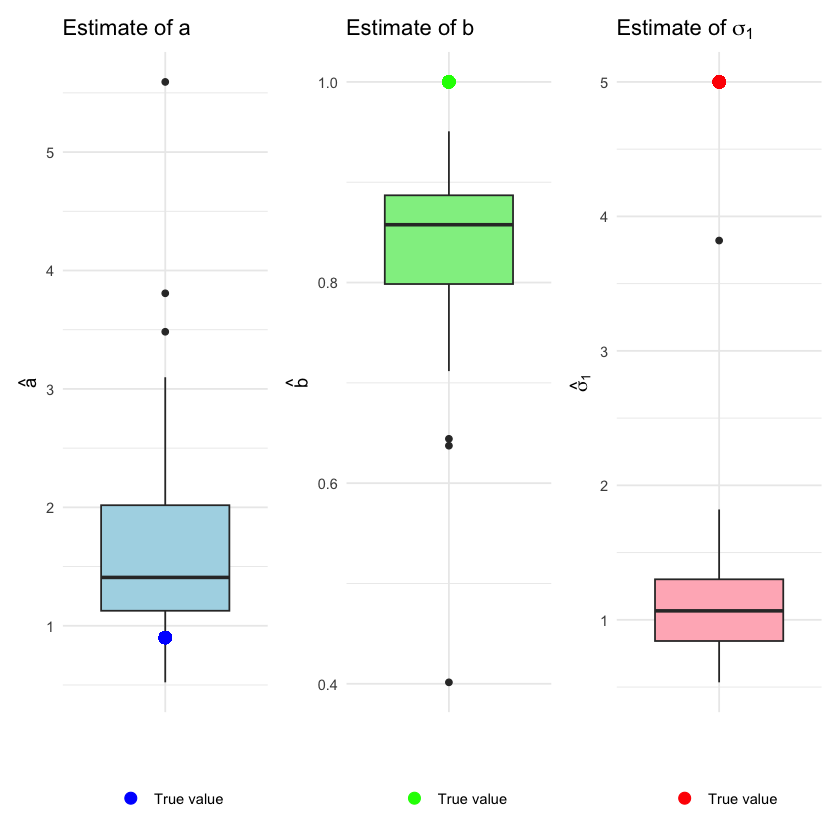

In [240]:
library(ggplot2)
library(patchwork)

set.seed(25)
A <- 0.9
B <- 1
C <- 1
X0 <- 5
n <- 100
m <- 100
df <- c(100, 5, 2, 1)

plots_list <- list()

for (v in 1:4) {
  
  y <- matrix(NA, nrow = n, ncol = m)
  Estimatedparameters <- matrix(NA, nrow = m, ncol = 3)
  
  for (j in 1:m) {
    X <- X0
    for (i in 1:n) {
      X <- A * X + B + rt(1, df[v])
      y[i, j] <- C * X + rnorm(1)
    }
  }
  
  for (j in 1:m) {
    Estimatedparameters[j, ] <- optim(
      fn = myLogLikFun, 
      par = c(5, 5, 5), 
      y = y[, j], 
      R = 1, 
      x_prior = 0, 
      P_prior = 10
    )$par
  }
  
  # Data frame for plotting
est_df <- data.frame(
  a = Estimatedparameters[,1],
  b = Estimatedparameters[,2],
  sigma = Estimatedparameters[,3]
)

# Create each individual boxplot
b1 <- ggplot(est_df, aes(x = "", y = a)) +
  geom_boxplot(fill = "lightblue") +
  geom_point(aes(x = 1, y = A, color = "True value"), size = 3) +  # Map color
  scale_color_manual(name = "", values = c("True value" = "blue")) +  # Define color
  labs(title = "Estimate of a", y = expression(hat(a)), x = "") +
  theme_minimal() +
  theme(legend.position = "bottom")  # Optional: place legend at bottom

b2 <- ggplot(est_df, aes(x = "", y = b)) +
  geom_boxplot(fill = "lightgreen") +
  geom_point(aes(x = 1, y = B, color = "True value"), size = 3) +
  scale_color_manual(name = "", values = c("True value" = "green")) +
  labs(title = "Estimate of b", y = expression(hat(b)), x = "") +
  theme_minimal() +
  theme(legend.position = "bottom")

b3 <- ggplot(est_df, aes(x = "", y = sigma)) +
  geom_boxplot(fill = "lightpink") +
  geom_point(aes(x = 1, y = sigma1, color = "True value"), size = 3) +
  scale_color_manual(name = "", values = c("True value" = "red")) +
  labs(title = expression("Estimate of" ~ sigma[1]), y = expression(hat(sigma)[1]), x = "") +
  theme_minimal() +
  theme(legend.position = "bottom")

  # Combine for this df
  plots_list[[v]] <- b1 | b2 | b3
}

# Now combine all 4 plots vertically
plots_list[[1]]


Warning message in geom_point(aes(x = 1, y = A, color = "True value"), size = 3):
"All aesthetics have length 1, but the data has 100 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_point(aes(x = 1, y = B, color = "True value"), size = 3):
"All aesthetics have length 1, but the data has 100 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."
Warning message in geom_point(aes(x = 1, y = sigma1, color = "True value"), size = 3):
"All aesthetics have length 1, but the data has 100 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


quartz_off_screen 
                3

pdf 
  2

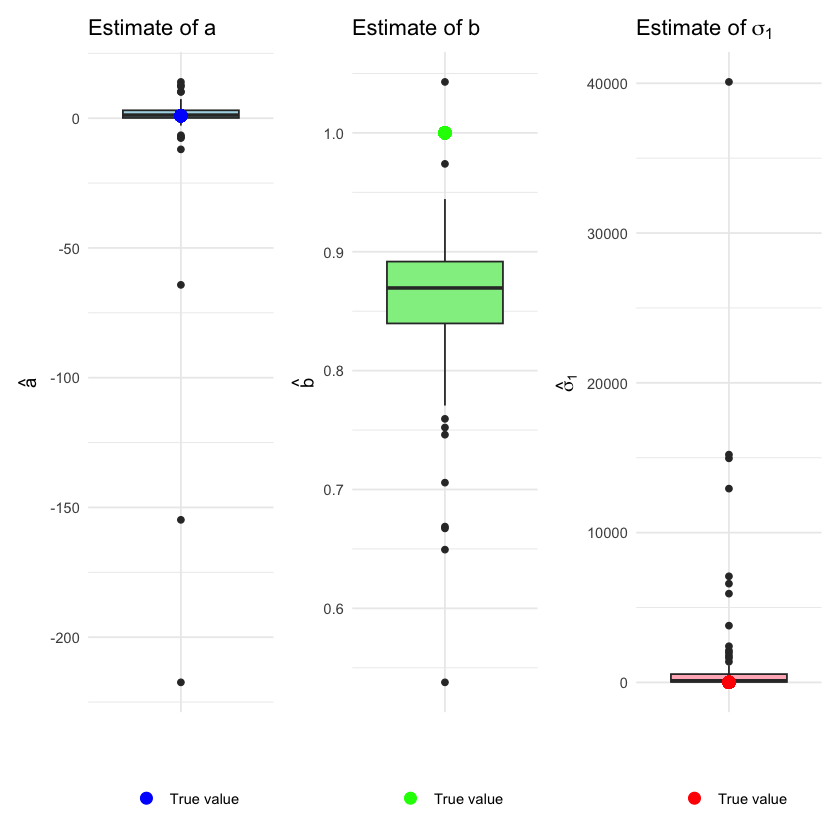

In [249]:
plots_list[[4]]
dev.copy(png, file = "1,54.png", width = 600, height = 600, res = 100)
dev.off()